<div align="center">
    <h1><b>Εργασία Ενισχυτικής Μηχανικής Μάθησης</b></h1>
</div>

## **Εισαγωγικά**
Αυτό το notebook αποτελεί κομμάτι μιας εργασίας στο μάθημα **'Ενισχυτική Μηχανική Μάθηση & Στοχαστικά Παίγνια'** του τμήματος **[Πληροφορικής και Τηλεπικοινωνιών](https://www.di.uoa.gr/)** του **Ε.Κ.Π.Α.**

### **Σκοπός**
Σκοπός της εργασίας είναι **πειραματιστούμε** με διάφορους **αλγορίθμους μηχανικής μάθησης**, έτσι ώστε να εκπαιδεύσουμε ένα μοντέλο πάνω σε ένα συγκεκριμένο **περιβάλλον** του **[Open-AI Gym ή Gymnasium](https://www.gymlibrary.dev/index.html)**

### **Μέλη Εργασίας**
Τα μέλη που αποτελούν αυτήν την εργασία είναι τα ακόλουθα:

| Όνομα | Επώνυμο | Α.Μ. | Email |
| :---: | :---: | :---: | :---: |
| Αντώνης | Ζήκας | 1115202100038 | sdi2100038@di.uoa.gr |
| Παναγιώτης | Παπαποστόλου | 1115202100142 | sdi2100142@di.uoa.gr |


## **Επιλογή και Ανάλυση Περιβάλλοντος**
Σε αυτήν την εργασία επιλέξαμε να ασχοληθούμε με το περιβάλλον **[CartPole-v1](https://www.gymlibrary.dev/environments/classic_control/cart_pole/)** το οποίο ανήκει στην κατηγορία **[Clasic Control](https://www.gymlibrary.dev/environments/classic_control/)**. 

<div align="center">
<img src="../assets/imgs/cart-pole-diagram.png" width="500px">    
</div>

Ας αναλύσουμε αυτό το περιβάλλον.

### **Action Space**:
Για το συγκεκριμένο περιβάλλον υπάρχουν **δύο ενέργειες** (actions) που μπορούν να γίνουν. Συγκεκριμένα το **καροτσάκι** (cart) μπορεί να μετακινηθεί είτε **αριστερά** είτε **δεξιά**. Οι ενέργειες αυτές αναπαρίστανται με **0** και **1** αντίστοιχα και περιγράφονται στον παρακάτω πίνακα:

| Number | Action |
| :---: | :---: |
| 0 | Μετακίνηση προς τα αριστερά |
| 1 | Μετακίνηση προς τα δεξιά |

Επομένως το **action** του συγκεκριμένου περιβάλλοντος είναι ένα `ndarray` διαστάσεων `(1,)` και μπορεί να πάρει δύο τιμές `{1, 0}`.

### **Observation Space**:
Το **observation space** για το συγκεκριμένο περιβάλλον είναι μία συλλογή από **4** τιμές.
1. Την **θέση** του καροτσιού **(Cart Position)**
2. Την **ταχύτητα** του καροτσιού **(Cart Velocity)**
3. Την **γωνία** που σχηματίζει το κοντάρι με τον κάθετο άξονα **(Pole Angle)**
4. την **ταχύτητα** του κονταριού καθώς πέφτει **(Pole Angular Velocity)**

Αυτές οι τιμές αποθηκέυονται μέσα σε ένα `ndarray` διαστάσεων `(4,)` και κάθε τιμή έχει ορισμένα συγκεκριμένα όρια τα οποία περιγράφονται παρακάτω:

| Array index | Observation | Min Value | Max Value |
| :---: | :---: | :---: | :---: |
| 0 | Cart Position | $-4.8$ | $4.8$ |
| 1 | Cart Velocity | $-\infty$ | $+\infty$ |
| 2 | Pole Angle | ~ $0.418$ rad (-$24^{\circ}$) | ~ $0.418$ rad ($24^{\circ}$) |
| 3 | Pole Angular Velocity | $-\infty$ | $+\infty$ |


### **Reward**:
Για κάθε βήμα στην εκπαίδευση του μοντέλου η **αμοιβή** (reward) που λαμβάνει ο επιλεγμένος **πράκτορας** (agent) είναι `+1` συμπεριλαμβανομένου και του **βήματος τερματισμού**. Το **κατώφλι** (threshold) των αμοιβών στο συγκεκριμένο περιβάλλον είναι **475**.

## **Φόρτωση Περιβάλλοντος στην Python**

In [3]:
import gymnasium as gym

env = gym.make('CartPole-v1')
observations = env.observation_space.shape[0]
actions = env.action_space.n

print(f"Observations: {observations}, Actions: {actions}")

Observations: 4, Actions: 2


Όπως παρατηρούμε από την παραπάνω εκτέλεση του κώδικα, τα **observations** και τα **actions** είναι πράγματι **4** και **2** αντίστοιχα. Ας επιχειρήσουμε να τρέξουμε αυτό το περιβάλλον **χωρίς** κάποιο εκπαιδευμένο μοντέλο και ας παρατηρήσουμε τα αποτελέσματα.

In [4]:
epochs = 100
epochs_scores = []

for epoch in range(1, epochs+1):
    env.reset()
    done = False
    score = 0
    while not done:
        action = env.action_space.sample() # Chose a random action from 0 and 1
        observation, reward, terminated, truncated, _ = env.step(action)
        score += reward
        if terminated or truncated:
            observation, _ = env.reset()
            done = True
    
    epochs_scores.append(score)


Ας οπτικοποιήσουμε το συνολικό **score** που έπιασε το περιβάλλον μας για κάθε **εποχή** (epoch).

<Figure size 640x480 with 0 Axes>

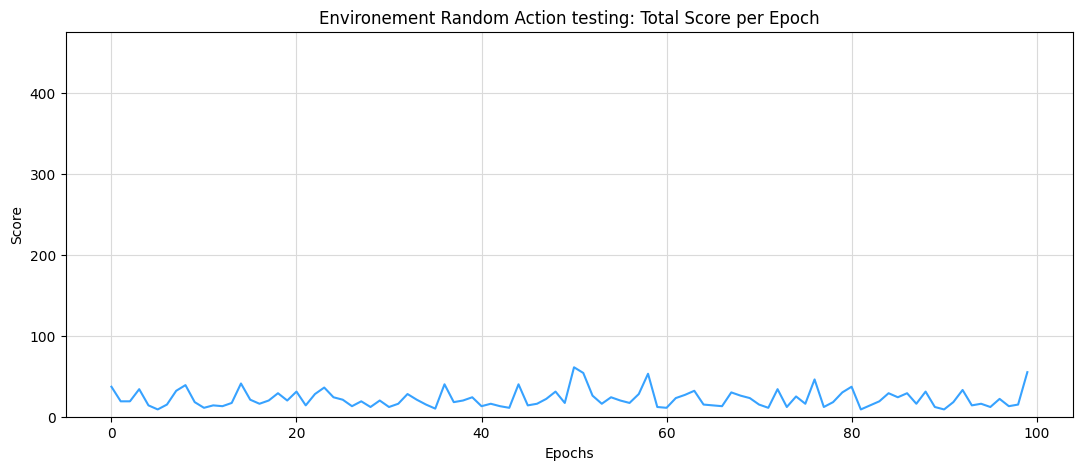

In [5]:
from matplotlib import pyplot as plt

plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(epochs_scores, color='#37A2FF')
plt.ylim(0, 475)
plt.title("Environement Random Action testing: Total Score per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.grid(color='#DADADA')
plt.show()

Από το παραπάνω διάγραμμα παρατηρούμε πως το συνολικό **score** που πιάνει το περιβάλλον είναι πολύ χαμηλό. Στόχος μας λοιπόν είναι να **εκπαιδεύσουμε** ένα μοντέλο, έτσι ώστε να καταφέρουμε να αυξήσουμε το **score** μέχρι και το αντίστοιχο **threashold** του περιβάλλοντος, το οποίο είναι **475**.

## **Υλοποίηση του αλγορίθμου DQN (Deep Q-Network)**
Θα ξεκινήσουμε υλοποιώντας αλγόριθμο **[DQN](https://medium.com/@samina.amin/deep-q-learning-dqn-71c109586bae)** ο οποίος θα χρησιμοποιηθεί για την εκπαίδευση του μοντέλου μας. Ο αλγόριθμος αυτός απαιτεί τη χρήση ενός **νευρωνικού δικτύου** (neural network) όπου για την κατασκευή του θα χρησιμοποιήσουμε το πακέτο **[PyTorch](https://pytorch.org/)**.

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:2400/format:webp/1*aqNgmfyBIStLrf9k7d9cng.jpeg" width="500px">
</div>

### **Κατασκευή Νευρωνικού Δικτύου**
Ας αρχίσουμε με τη κατασκευή του **νευρωνικού δικτύου**. Η **αρχιτεκτονική** του δικτύου θα είναι η ακόλουθη:
1. **Input Layer** with **4 nodes** (number of observations)
2. **Hidden Layer 1** with **128 nodes**
3. **Hidden Layer 2** with **128 nodes**
4. **Ouput Layer** with **2 nodes** (number of actions)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, observation):
        x = F.relu(self.fc1(observation))
        x = F.relu(self.fc2(x))
        actions = self.fc3(x)

        return actions


### Σύνδεση με συσκευή (CPU ή GPU)
Θα ορίσουμε επίσης το μοντέλο μας να συνδέεται σε συσκευή **GPU** εάν αυτή είναι διαθέσιμη στο εκάστωτε μηχάνημα, με στόχο την πιο αποδοτική εκτέλεση των διαδικασιών.

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Pytorch connected to {device}')

Pytorch connected to cpu


### Κατασκευή του ReplayBuffer (Memory)
Στη συνέχεια θα δημιουργήσουμε τη κλάση `ReplayBuffer` η οποία θα λειτουργήσει ως η **μνήμη** (memory) για την εκπαίδευση του μοντέλου μας χρησιμοποιώντας τον αλγόριθμο **DQN**.

In [8]:
import numpy as np
from collections import deque

# Experience Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (
            torch.tensor(np.array(states), dtype=torch.float32),
            torch.tensor(np.array(actions), dtype=torch.long),
            torch.tensor(np.array(rewards), dtype=torch.float32),
            torch.tensor(np.array(next_states), dtype=torch.float32),
            torch.tensor(np.array(dones), dtype=torch.float32),
        )

    def __len__(self):
        return len(self.buffer)

In [9]:
# Hyperparameters
GAMMA = 0.99        # Discount factor
LR = 1e-3           # Learning rate
BATCH_SIZE = 64     # Minibatch size
MEMORY_SIZE = 10000 # Replay buffer size
EPSILON_START = 1.0 # Starting exploration probability
EPSILON_END = 0.01  # Minimum exploration probability
EPSILON_DECAY = 0.995 # Epsilon decay rate
TARGET_UPDATE = 10  # How often to update the target network
NUM_EPISODES = 500  # Number of training episodes

In [10]:
# Initialize networks, optimizer, and replay buffer
policy_net = DQN(observations, actions)
target_net = DQN(observations, actions)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

DQN(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

In [11]:
import torch.optim as optim

optimizer = optim.Adam(policy_net.parameters(), lr=LR)
replay_buffer = ReplayBuffer(MEMORY_SIZE)

In [12]:
# Epsilon-greedy policy
epsilon = EPSILON_START
def select_action(state):
    global epsilon
    if random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            return policy_net(state).argmax(dim=1).item()  # Exploit

In [13]:
import random

total_rewards = []
max_reward = -1

# Training loop
for episode in range(NUM_EPISODES):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Select action
        action = select_action(state)

        # Step in the environment
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        # Store transition in replay buffer
        replay_buffer.push(state, action, reward, next_state, done)
        state = next_state

        # Sample from replay buffer and train
        if len(replay_buffer) > BATCH_SIZE:
            states, actions, rewards, next_states, dones = replay_buffer.sample(BATCH_SIZE)

            # Compute Q-values and target Q-values
            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            with torch.no_grad():
                next_q_values = target_net(next_states).max(dim=1)[0]
                target_q_values = rewards + GAMMA * next_q_values * (1 - dones)

            # Compute loss and optimize
            loss = nn.MSELoss()(q_values, target_q_values)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Update epsilon
    epsilon = max(EPSILON_END, epsilon * EPSILON_DECAY)

    # Update target network
    if episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

    total_rewards.append(total_reward)
    if (total_reward > max_reward):
        max_reward = total_reward
        torch.save(policy_net.state_dict(), "best_network.pth")
        print("Model saved!")
    
    print(f"Episode {episode}, Total Reward: {total_reward}")

env.close()

Model saved!
Episode 0, Total Reward: 28.0
Model saved!
Episode 1, Total Reward: 29.0
Episode 2, Total Reward: 16.0
Episode 3, Total Reward: 17.0
Episode 4, Total Reward: 22.0
Episode 5, Total Reward: 12.0
Episode 6, Total Reward: 11.0
Episode 7, Total Reward: 13.0
Episode 8, Total Reward: 18.0


Episode 9, Total Reward: 29.0
Episode 10, Total Reward: 13.0
Episode 11, Total Reward: 21.0
Episode 12, Total Reward: 14.0
Episode 13, Total Reward: 15.0
Episode 14, Total Reward: 22.0
Episode 15, Total Reward: 27.0
Episode 16, Total Reward: 13.0
Episode 17, Total Reward: 15.0
Episode 18, Total Reward: 21.0
Episode 19, Total Reward: 14.0
Model saved!
Episode 20, Total Reward: 33.0
Episode 21, Total Reward: 9.0
Episode 22, Total Reward: 28.0
Episode 23, Total Reward: 27.0
Episode 24, Total Reward: 14.0
Episode 25, Total Reward: 18.0
Episode 26, Total Reward: 23.0
Episode 27, Total Reward: 14.0
Episode 28, Total Reward: 13.0
Model saved!
Episode 29, Total Reward: 39.0
Episode 30, Total Reward: 35.0
Episode 31, Total Reward: 16.0
Episode 32, Total Reward: 21.0
Episode 33, Total Reward: 17.0
Episode 34, Total Reward: 15.0
Model saved!
Episode 35, Total Reward: 72.0
Episode 36, Total Reward: 14.0
Episode 37, Total Reward: 57.0
Episode 38, Total Reward: 42.0
Episode 39, Total Reward: 11.0
Ep

<Figure size 640x480 with 0 Axes>

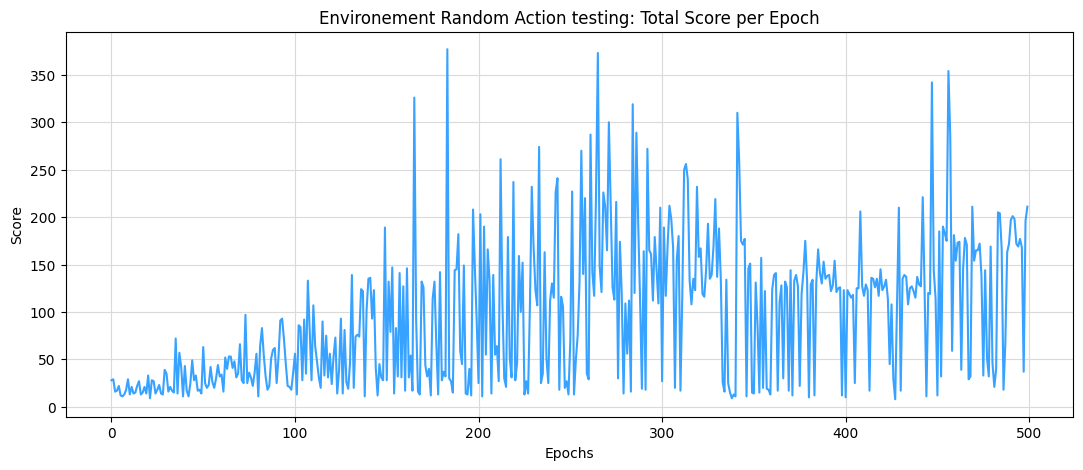

In [14]:
from matplotlib import pyplot as plt

plt.figure()
plt.figure(figsize=(13, 5))
plt.plot(total_rewards, color='#37A2FF')
# plt.ylim(0, 475)
plt.title("Environement Random Action testing: Total Score per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.grid(color='#DADADA')
plt.show()

In [15]:
print(max(total_rewards))

377.0


In [20]:
import torch
import gymnasium as gym

def test_agent(env, policy_net, num_episodes=10, render=True):
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            if render:
                env.render()

            # Convert state to tensor and get action from policy network
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            with torch.no_grad():
                action = policy_net(state_tensor).argmax(dim=1).item()  # Choose action with highest Q-value

            # Take the action in the environment
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            state = next_state

        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    env.close()
    
env = gym.make('CartPole-v1')
observations = env.observation_space.shape[0]
actions = env.action_space.n

# Call the test function
policy_net = DQN(observations, actions)
policy_net.load_state_dict(torch.load('../models/makis.pth'))
policy_net.eval()

test_agent(env, policy_net, num_episodes=10, render=False)


/tmp/ipykernel_5810/3130925697.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_net.load_state_dict(torch.load('../models/makis.pth'))


Episode 1: Total Reward = 420.0
Episode 2: Total Reward = 513.0
Episode 3: Total Reward = 2727.0
Episode 4: Total Reward = 440.0
Episode 5: Total Reward = 375.0
Episode 6: Total Reward = 397.0
Episode 7: Total Reward = 862.0
Episode 8: Total Reward = 468.0
Episode 9: Total Reward = 411.0
Episode 10: Total Reward = 428.0
